**Question 1**

**Data Preprocessing (a)**

In [1]:
import pandas as pd 
import numpy as np 

import keras as keras
import tensorflow as tf

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ^DJI.csv to ^DJI.csv
Saving countryriskdata.csv to countryriskdata.csv
Saving iris.csv to iris.csv


In [3]:
DJI = pd.read_csv("^DJI.csv",usecols=[0,1], header=0)
DJI

,Date,Adj Close
0,02/01/2014,16441.34961
1,03/01/2014,16469.99023
2,06/01/2014,16425.09961
3,07/01/2014,16530.93945
4,08/01/2014,16462.74023
...,...,...
1504,23/12/2019,28551.52930
1505,24/12/2019,28515.44922
1506,26/12/2019,28621.39063
1507,27/12/2019,28645.25977


In [4]:
DJI['lag'] = DJI['Adj Close'].shift(1)
DJI['Rt'] = (DJI['Adj Close']-DJI['lag'])/DJI['lag']

In [5]:
DJI = DJI.drop(columns='lag')
DJI

,Date,Adj Close,Rt
0,02/01/2014,16441.34961,NaN
1,03/01/2014,16469.99023,0.001742
2,06/01/2014,16425.09961,-0.002726
3,07/01/2014,16530.93945,0.006444
4,08/01/2014,16462.74023,-0.004126
...,...,...,...
1504,23/12/2019,28551.52930,0.003389
1505,24/12/2019,28515.44922,-0.001264
1506,26/12/2019,28621.39063,0.003715
1507,27/12/2019,28645.25977,0.000834


**(b) Get R.normed**

In [6]:
train = DJI.iloc[:1258]
test = DJI.iloc[-251:]
test.reset_index(drop=True, inplace=True)
test

,Date,Adj Close,Rt
0,02/01/2019,23346.24023,0.000805
1,03/01/2019,22686.22070,-0.028271
2,04/01/2019,23433.16016,0.032925
3,07/01/2019,23531.34961,0.004190
4,08/01/2019,23787.44922,0.010883
...,...,...,...
246,23/12/2019,28551.52930,0.003389
247,24/12/2019,28515.44922,-0.001264
248,26/12/2019,28621.39063,0.003715
249,27/12/2019,28645.25977,0.000834


In [7]:
max_train = train['Rt'].max()
min_train = train['Rt'].min()
min_train

-0.04604885148184396

In [8]:
DJI['R.normed'] = (DJI['Rt']-min_train)/(max_train-min_train)
DJI

,Date,Adj Close,Rt,R.normed
0,02/01/2014,16441.34961,NaN,NaN
1,03/01/2014,16469.99023,0.001742,0.498368
2,06/01/2014,16425.09961,-0.002726,0.451780
3,07/01/2014,16530.93945,0.006444,0.547399
4,08/01/2014,16462.74023,-0.004126,0.437181
...,...,...,...,...
1504,23/12/2019,28551.52930,0.003389,0.515545
1505,24/12/2019,28515.44922,-0.001264,0.467025
1506,26/12/2019,28621.39063,0.003715,0.518945
1507,27/12/2019,28645.25977,0.000834,0.488899


**(c) Build up matrix.**

In [9]:
DJI['X1'] = DJI['R.normed'].shift(5)
DJI['X2'] = DJI['R.normed'].shift(4)
DJI['X3'] = DJI['R.normed'].shift(3)
DJI['X4'] = DJI['R.normed'].shift(2)
DJI['X5'] = DJI['R.normed'].shift(1)
DJI['Y'] = DJI['R.normed']
DJI.head(10)

,Date,Adj Close,Rt,R.normed,X1,X2,X3,X4,X5,Y
0,02/01/2014,16441.34961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/01/2014,16469.99023,0.001742,0.498368,NaN,NaN,NaN,NaN,NaN,0.498368
2,06/01/2014,16425.09961,-0.002726,0.451780,NaN,NaN,NaN,NaN,0.498368,0.451780
3,07/01/2014,16530.93945,0.006444,0.547399,NaN,NaN,NaN,0.498368,0.451780,0.547399
4,08/01/2014,16462.74023,-0.004126,0.437181,NaN,NaN,0.498368,0.451780,0.547399,0.437181
5,09/01/2014,16444.75977,-0.001092,0.468813,NaN,0.498368,0.451780,0.547399,0.437181,0.468813
6,10/01/2014,16437.05078,-0.000469,0.475314,0.498368,0.451780,0.547399,0.437181,0.468813,0.475314
7,13/01/2014,16257.94043,-0.010897,0.366570,0.451780,0.547399,0.437181,0.468813,0.475314,0.366570
8,14/01/2014,16373.86035,0.007130,0.554555,0.547399,0.437181,0.468813,0.475314,0.366570,0.554555
9,15/01/2014,16481.93945,0.006601,0.549035,0.437181,0.468813,0.475314,0.366570,0.554555,0.549035


In [10]:
X_train = DJI.iloc[6:1258]
X_train.reset_index(drop=True, inplace=True)
X_train = X_train.drop(columns=['Date','Rt','R.normed','Y','Adj Close'])
X_train

,X1,X2,X3,X4,X5
0,0.498368,0.451780,0.547399,0.437181,0.468813
1,0.451780,0.547399,0.437181,0.468813,0.475314
2,0.547399,0.437181,0.468813,0.475314,0.366570
3,0.437181,0.468813,0.475314,0.366570,0.554555
4,0.468813,0.475314,0.366570,0.554555,0.549035
...,...,...,...,...,...
1247,0.260598,0.516738,0.325170,0.272719,0.291238
1248,0.516738,0.325170,0.272719,0.291238,0.176740
1249,0.325170,0.272719,0.291238,0.176740,1.000000
1250,0.272719,0.291238,0.176740,1.000000,0.598881


In [11]:
X_test = DJI.iloc[-251:]
X_test.reset_index(drop=True, inplace=True)
X_test = X_test.drop(columns=['Date','Rt','R.normed','Y','Adj Close'])
X_test

,X1,X2,X3,X4,X5
0,0.176740,1.000000,0.598881,0.445762,0.600055
1,1.000000,0.598881,0.445762,0.600055,0.488597
2,0.598881,0.445762,0.600055,0.488597,0.185390
3,0.445762,0.600055,0.488597,0.185390,0.823546
4,0.600055,0.488597,0.185390,0.823546,0.523898
...,...,...,...,...,...
246,0.517455,0.491751,0.469917,0.531045,0.508914
247,0.491751,0.469917,0.531045,0.508914,0.515545
248,0.469917,0.531045,0.508914,0.515545,0.467025
249,0.531045,0.508914,0.515545,0.467025,0.518945


In [12]:
Y_train = DJI.iloc[6:1258]
Y_train.reset_index(drop=True, inplace=True)
Y_train = Y_train['Y']
Y_train

0       0.475314
1       0.366570
2       0.554555
3       0.549035
4       0.439121
          ...   
1247    0.176740
1248    1.000000
1249    0.598881
1250    0.445762
1251    0.600055
Name: Y, Length: 1252, dtype: float64

In [13]:
Y_test = DJI.iloc[-251:]
Y_test.reset_index(drop=True, inplace=True)
Y_test = Y_test['Y']
Y_test

0      0.488597
1      0.185390
2      0.823546
3      0.523898
4      0.593695
         ...   
246    0.515545
247    0.467025
248    0.518945
249    0.488899
250    0.413539
Name: Y, Length: 251, dtype: float64

**(d) Build up FFNN.**

In [14]:
from keras import layers
# Create sequential model
model = keras.Sequential()

# Add layers, first layer needs input dimension
model.add(layers.Dense(128, kernel_initializer='normal', input_shape = (X_train.shape[1],), activation="relu"))
model.add(layers.Dense(128, kernel_initializer='normal', activation="relu"))
model.add(layers.Dense(1, activation = "linear"))

# add loss function and optimizer
model.compile(optimizer = "RMSprop", loss = "mse", 
              metrics = [tf.keras.metrics.MeanSquaredError()])

# Model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x = X_train, y = Y_train, 
                    shuffle = True, 
                    validation_split = 0.3,
                    batch_size = 16,                    
                    epochs = 30)

Epoch 1/30
55/55 [==============================] - 1s 7ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 2/30
55/55 [==============================] - 0s 3ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 3/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 4/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5/30
55/55 [==============================] - 0s 5ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 6/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 7/30
55/55 [======================

**(e) Predict using X_test.**

In [16]:
Y_pred = model.predict(X_test)
R_predt = Y_pred * (max_train-min_train)+min_train
R_predt

8/8 [==============================] - 0s 2ms/step


array([[-0.00068217],
       [ 0.00241056],
       [ 0.00331566],
       [ 0.00232946],
       [ 0.0021907 ],
       [ 0.00583371],
       [ 0.00034538],
       [ 0.00280727],
       [ 0.00209553],
       [ 0.00223525],
       [ 0.00156407],
       [ 0.0018321 ],
       [ 0.00253534],
       [ 0.00200737],
       [ 0.0026554 ],
       [ 0.00239651],
       [ 0.0014669 ],
       [ 0.00304775],
       [ 0.00196434],
       [ 0.00241113],
       [ 0.00128188],
       [ 0.00279753],
       [ 0.0030072 ],
       [ 0.00160675],
       [ 0.002264  ],
       [ 0.0024233 ],
       [ 0.00236048],
       [ 0.00157234],
       [ 0.00140498],
       [ 0.00233734],
       [ 0.00217598],
       [ 0.00328797],
       [ 0.00131968],
       [ 0.00214097],
       [ 0.00350124],
       [ 0.00182838],
       [ 0.00201831],
       [ 0.00177096],
       [ 0.00263977],
       [ 0.00189634],
       [ 0.00172251],
       [ 0.00163177],
       [ 0.00192221],
       [ 0.00219192],
       [ 0.00143771],
       [ 0

In [18]:
test['R_pred t']= R_predt
test

<ipython-input-18-db35dbe3d107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['R_pred t']= R_predt


,Date,Adj Close,Rt,R_pred t
0,02/01/2019,23346.24023,0.000805,-0.000682
1,03/01/2019,22686.22070,-0.028271,0.002411
2,04/01/2019,23433.16016,0.032925,0.003316
3,07/01/2019,23531.34961,0.004190,0.002329
4,08/01/2019,23787.44922,0.010883,0.002191
...,...,...,...,...
246,23/12/2019,28551.52930,0.003389,0.001868
247,24/12/2019,28515.44922,-0.001264,0.002282
248,26/12/2019,28621.39063,0.003715,0.002040
249,27/12/2019,28645.25977,0.000834,0.001958


In [19]:
test['S t-1'] = test['Adj Close'].shift(1)
test

<ipython-input-19-b110d56b35c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['S t-1'] = test['Adj Close'].shift(1)


,Date,Adj Close,Rt,R_pred t,S t-1
0,02/01/2019,23346.24023,0.000805,-0.000682,NaN
1,03/01/2019,22686.22070,-0.028271,0.002411,23346.24023
2,04/01/2019,23433.16016,0.032925,0.003316,22686.22070
3,07/01/2019,23531.34961,0.004190,0.002329,23433.16016
4,08/01/2019,23787.44922,0.010883,0.002191,23531.34961
...,...,...,...,...,...
246,23/12/2019,28551.52930,0.003389,0.001868,28455.08984
247,24/12/2019,28515.44922,-0.001264,0.002282,28551.52930
248,26/12/2019,28621.39063,0.003715,0.002040,28515.44922
249,27/12/2019,28645.25977,0.000834,0.001958,28621.39063


In [20]:
test['S pred'] = test['S t-1']*(1+test['R_pred t'])
test

<ipython-input-20-909b74a44004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['S pred'] = test['S t-1']*(1+test['R_pred t'])


,Date,Adj Close,Rt,R_pred t,S t-1,S pred
0,02/01/2019,23346.24023,0.000805,-0.000682,NaN,NaN
1,03/01/2019,22686.22070,-0.028271,0.002411,23346.24023,23402.517067
2,04/01/2019,23433.16016,0.032925,0.003316,22686.22070,22761.441111
3,07/01/2019,23531.34961,0.004190,0.002329,23433.16016,23487.746974
4,08/01/2019,23787.44922,0.010883,0.002191,23531.34961,23582.899952
...,...,...,...,...,...,...
246,23/12/2019,28551.52930,0.003389,0.001868,28455.08984,28508.251004
247,24/12/2019,28515.44922,-0.001264,0.002282,28551.52930,28616.677752
248,26/12/2019,28621.39063,0.003715,0.002040,28515.44922,28573.628350
249,27/12/2019,28645.25977,0.000834,0.001958,28621.39063,28677.438497


**(f) Compute the test mean absolute percentage error (MAPE).**

In [21]:
MAPE = 0
for i in range(1,251):
  MAPE = MAPE + 1/250 * abs((test['Adj Close'][i]-test['S pred'][i])/test['Adj Close'][i])
MAPE

0.0056743434302730465

**Question 2**

In [22]:
countryrisk = pd.read_csv('countryriskdata.csv')
countryrisk.head(10)

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,39,1.867,3.822,3.403
1,Algeria,DZ,34,2.213,4.160,4.202
2,Argentina,AR,36,1.957,4.568,-2.298
3,Armenia,AM,33,2.218,4.126,0.208
4,Australia,AU,79,1.465,8.244,2.471
5,Austria,AT,75,1.278,8.012,1.482
6,Azerbaijan,AZ,30,2.450,3.946,-3.772
7,Bahrain,BH,43,2.398,6.157,2.915
8,Bangladesh,BD,26,2.045,3.117,6.923
9,Belgium,BE,77,1.528,7.839,1.239


**(a) Carry out K-means clustering for K = 3**

In [23]:
from sklearn.cluster import KMeans
km_out = KMeans(n_clusters = 3, random_state = 2203441)
km_out.fit(countryrisk[['Corruption','Peace','Legal','GDP Growth']])
km_out.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
countryrisk['KMeans'] = km_out.labels_
countryrisk.head(30)

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth,KMeans
0,Albania,AL,39,1.867,3.822,3.403,0
1,Algeria,DZ,34,2.213,4.160,4.202,0
2,Argentina,AR,36,1.957,4.568,-2.298,0
3,Armenia,AM,33,2.218,4.126,0.208,0
4,Australia,AU,79,1.465,8.244,2.471,1
5,Austria,AT,75,1.278,8.012,1.482,1
6,Azerbaijan,AZ,30,2.450,3.946,-3.772,0
7,Bahrain,BH,43,2.398,6.157,2.915,0
8,Bangladesh,BD,26,2.045,3.117,6.923,0
9,Belgium,BE,77,1.528,7.839,1.239,1


**(b) Use hierarchical clustering (with complete linkage) to determine 3 clusters.**

In [25]:
x = countryrisk.drop(columns = ['Country','Abbrev','KMeans'])
x

,Corruption,Peace,Legal,GDP Growth
0,39,1.867,3.822,3.403
1,34,2.213,4.160,4.202
2,36,1.957,4.568,-2.298
3,33,2.218,4.126,0.208
4,79,1.465,8.244,2.471
...,...,...,...,...
117,17,2.651,3.000,-18.000
118,33,1.906,4.930,6.211
119,14,3.399,2.728,-9.779
120,38,1.783,4.917,2.967


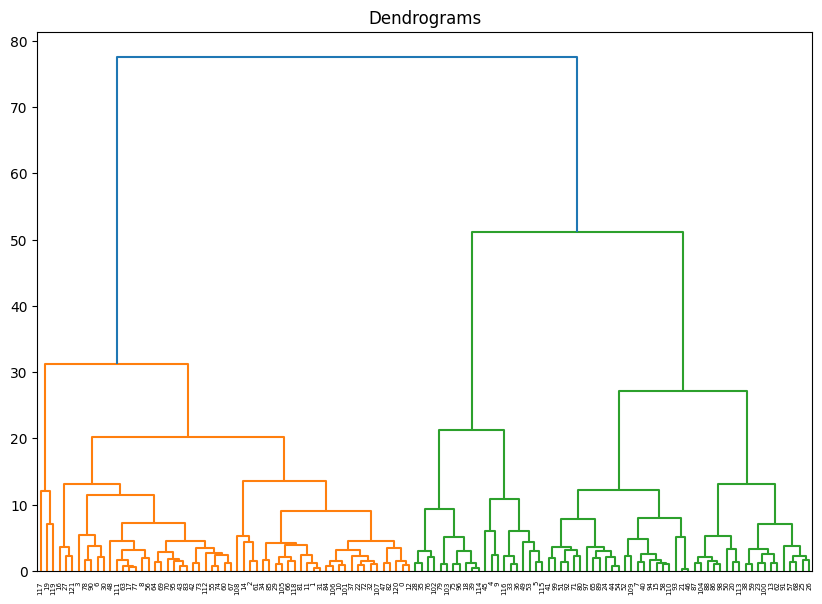

In [26]:
import scipy.cluster.hierarchy as shc
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='complete'))

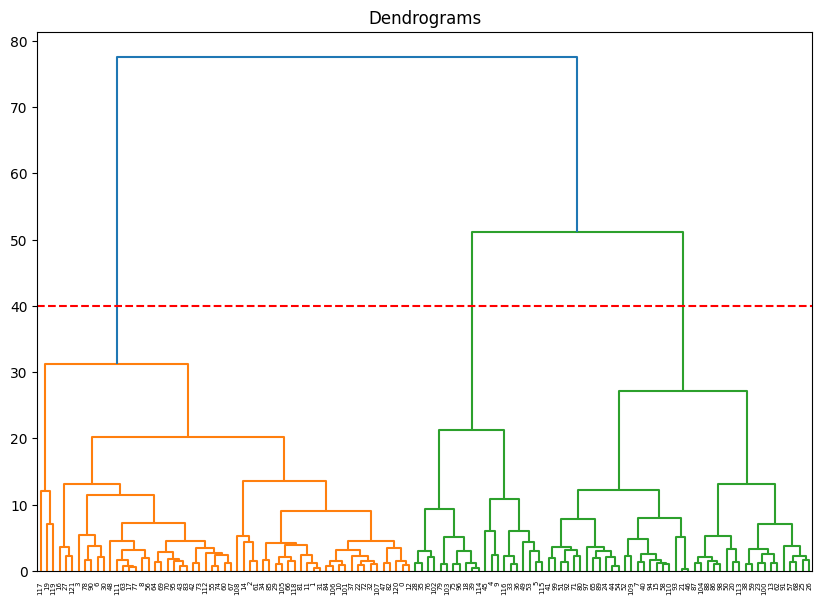

In [27]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='complete'))
plt.axhline(y=40, color='r', linestyle='--')

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
Y = cluster.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
x_hir_result = x
x_hir_result['Hierarchical clustering'] = Y
x_hir_result['Country'] = countryrisk['Country']
x_hir_result.head(30)

,Corruption,Peace,Legal,GDP Growth,Hierarchical clustering,Country
0,39,1.867,3.822,3.403,0,Albania
1,34,2.213,4.160,4.202,0,Algeria
2,36,1.957,4.568,-2.298,0,Argentina
3,33,2.218,4.126,0.208,0,Armenia
4,79,1.465,8.244,2.471,2,Australia
5,75,1.278,8.012,1.482,2,Austria
6,30,2.450,3.946,-3.772,0,Azerbaijan
7,43,2.398,6.157,2.915,1,Bahrain
8,26,2.045,3.117,6.923,0,Bangladesh
9,77,1.528,7.839,1.239,2,Belgium


**(c) Repeat parts (a) & (b) with scaled features**

In [30]:
x_std = x.drop(columns = ['Hierarchical clustering','Country'])
x_std['Corruption'] = (x_std['Corruption'] - x_std['Corruption'].mean()) / x_std['Corruption'].std()
x_std['Peace'] = (x_std['Peace'] - x_std['Peace'].mean()) / x_std['Peace'].std()
x_std['Legal'] = (x_std['Legal'] - x_std['Legal'].mean()) / x_std['Legal'].std()
x_std['GDP Growth'] = (x_std['GDP Growth'] - x_std['GDP Growth'].mean()) / x_std['GDP Growth'].std()
x_std

,Corruption,Peace,Legal,GDP Growth
0,-0.378414,-0.305319,-1.194666,0.317896
1,-0.639833,0.467304,-0.967413,0.564392
2,-0.535266,-0.104348,-0.693096,-1.440899
3,-0.692117,0.478469,-0.990273,-0.667782
4,1.712936,-1.202990,1.778450,0.030368
...,...,...,...,...
117,-1.528657,1.445363,-1.747335,-6.285067
118,-0.692117,-0.218231,-0.449706,1.184182
119,-1.685509,3.115656,-1.930213,-3.748836
120,-0.430698,-0.492892,-0.458447,0.183387


In [31]:
km_out_std = KMeans(n_clusters = 3, random_state = 2203441)
km_out_std.fit(x_std[['Corruption','Peace','Legal','GDP Growth']])
km_out_std.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 2], dtype=int32)

In [34]:
x_std_KMeans = x_std
x_std_KMeans['KMeans'] = km_out_std.labels_
x_std_KMeans['Country'] = countryrisk['Country']
x_std_KMeans.head(30)

,Corruption,Peace,Legal,GDP Growth,KMeans,Country
0,-0.378414,-0.305319,-1.194666,0.317896,0,Albania
1,-0.639833,0.467304,-0.967413,0.564392,0,Algeria
2,-0.535266,-0.104348,-0.693096,-1.440899,2,Argentina
3,-0.692117,0.478469,-0.990273,-0.667782,0,Armenia
4,1.712936,-1.202990,1.778450,0.030368,1,Australia
5,1.503801,-1.620563,1.622466,-0.274745,1,Austria
6,-0.848968,0.996528,-1.111295,-1.895638,2,Azerbaijan
7,-0.169279,0.880411,0.375263,0.167344,0,Bahrain
8,-1.058103,0.092158,-1.668671,1.403838,0,Bangladesh
9,1.608369,-1.062310,1.506150,-0.349712,1,Belgium


In [35]:
x_std = x_std.drop(columns = ['KMeans','Country'])

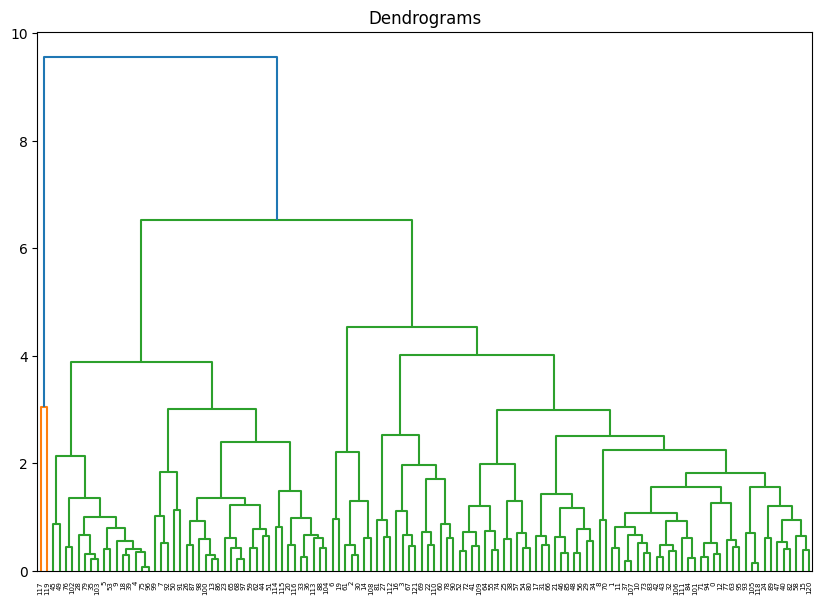

In [36]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_std, method='complete'))

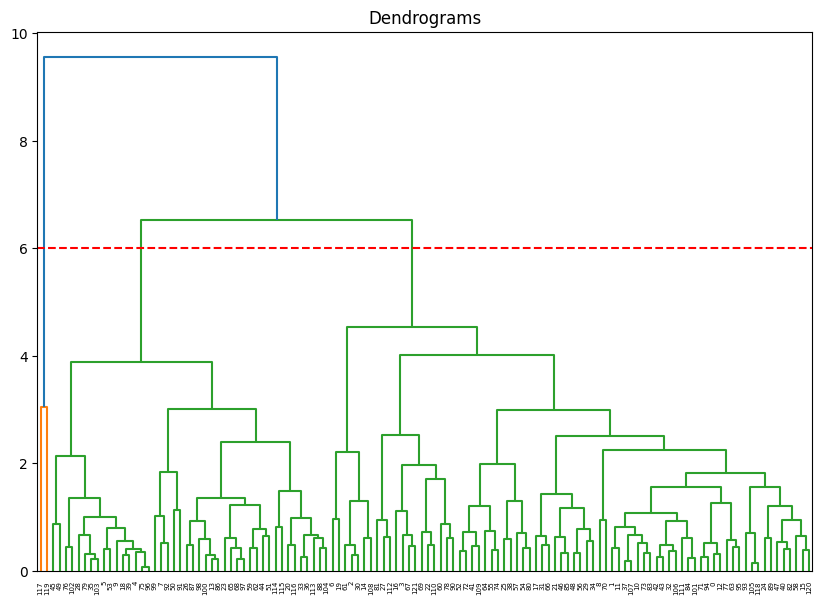

In [37]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x_std, method='complete'))
plt.axhline(y=6, color='r', linestyle='--')

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster_std = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
Y_std = cluster_std.fit_predict(x_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [39]:
x_hir_result_std = x_std
x_hir_result_std['Hierarchical clustering'] = Y_std
x_hir_result_std['Country'] = countryrisk['Country']
x_hir_result_std.head(30)

,Corruption,Peace,Legal,GDP Growth,Hierarchical clustering,Country
0,-0.378414,-0.305319,-1.194666,0.317896,0,Albania
1,-0.639833,0.467304,-0.967413,0.564392,0,Algeria
2,-0.535266,-0.104348,-0.693096,-1.440899,0,Argentina
3,-0.692117,0.478469,-0.990273,-0.667782,0,Armenia
4,1.712936,-1.202990,1.778450,0.030368,2,Australia
5,1.503801,-1.620563,1.622466,-0.274745,2,Austria
6,-0.848968,0.996528,-1.111295,-1.895638,0,Azerbaijan
7,-0.169279,0.880411,0.375263,0.167344,2,Bahrain
8,-1.058103,0.092158,-1.668671,1.403838,0,Bangladesh
9,1.608369,-1.062310,1.506150,-0.349712,2,Belgium


**(d) Compare the results**

For part(a), "0" means "moderate", "1" means "low" and "2" means "high" in risk level. For part(b), "0" means "moderate", "1" means "high" and "2" means "low" in risk level. For part(c) scaled KMeans, the clustering result is a little bit different. For each of the categorical number, what they represent are the same. However, the scaled model could identify more countries in high risk comparing with the model in part(a). This is because the data has been scaled (standardized). These variables could be assessed based on the same scale. For part(c) scaled hierarchical clustering, the result almost falls on two clusters, "0" means "high" risk level and "2" means "low" risk level ,with only two "1"s, which means "moderate". The scaled result is more polarized. Such scaling could make the result clearer and easy for interpretation.

**Question 3**

In [40]:
iris = pd.read_csv('iris.csv')
iris.head(10)

,Sepal_len,Sepal_wid,Petal_len,Petal_wid,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


**(a) Delete the column containing the species type and use “newiris” for this new dataset.**

In [41]:
newiris = iris.drop(columns = 'Species')
newiris.head(10)

,Sepal_len,Sepal_wid,Petal_len,Petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**(b) Perform a principal component analysis on the dataset newiris created above with “scale=TRUE”. Save your PCA results in “irpc”. Print “irpc” to see the output.**

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(newiris)
newiris_scaled = scaler.transform(newiris)
newiris_scaled = pd.DataFrame(newiris_scaled,columns=newiris.columns)
newiris_scaled

,Sepal_len,Sepal_wid,Petal_len,Petal_wid
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [44]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(newiris_scaled)
print("\nStandard Deviation:\n", np.sqrt(pca.explained_variance_))
print("\nComponents:\n", pca.components_.T)


Standard Deviation:
 [1.71408432 0.95925226 0.38437198 0.14440866]

Components:
 [[ 0.52106591  0.37741762 -0.71956635 -0.26128628]
 [-0.26934744  0.92329566  0.24438178  0.12350962]
 [ 0.5804131   0.02449161  0.14212637  0.80144925]
 [ 0.56485654  0.06694199  0.63427274 -0.52359713]]


In [45]:
lambda_, U = np.linalg.eig(newiris_scaled.cov())
# lambda is a special function in Python and cannot be used as an object
print("Eigenvalues:", lambda_)
print("Eigenvectors:\n", U)

Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [46]:
np.sqrt(lambda_)

array([1.71408432, 0.95925226, 0.38437198, 0.14440866])

In [47]:
pd.DataFrame({"Features":newiris.columns, "Center":scaler.mean_, "Scale":np.sqrt(scaler.var_)})

,Features,Center,Scale
0,Sepal_len,5.843333,0.825301
1,Sepal_wid,3.057333,0.434411
2,Petal_len,3.758000,1.759404
3,Petal_wid,1.199333,0.759693


In [48]:
pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2","PC3","PC4"], index = newiris.columns)

,PC1,PC2,PC3,PC4
Sepal_len,0.521066,0.377418,-0.719566,-0.261286
Sepal_wid,-0.269347,0.923296,0.244382,0.123510
Petal_len,0.580413,0.024492,0.142126,0.801449
Petal_wid,0.564857,0.066942,0.634273,-0.523597


In [66]:
irpc = pca.components_.T
irpc

array([[ 0.52106591,  0.37741762, -0.71956635, -0.26128628],
       [-0.26934744,  0.92329566,  0.24438178,  0.12350962],
       [ 0.5804131 ,  0.02449161,  0.14212637,  0.80144925],
       [ 0.56485654,  0.06694199,  0.63427274, -0.52359713]])

In [49]:
np.sqrt(pca.explained_variance_)

array([1.71408432, 0.95925226, 0.38437198, 0.14440866])

In [50]:
PCMatrix = pd.DataFrame(pca.transform(newiris_scaled), index = newiris.index, columns = ["PC1", "PC2","PC3","PC4"])
PCMatrix

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [51]:
print("Std dev:", np.sqrt(pca.explained_variance_))
print("Variance:", pca.explained_variance_)
print("Var %", pca.explained_variance_ratio_)

Std dev: [1.71408432 0.95925226 0.38437198 0.14440866]
Variance: [2.93808505 0.9201649  0.14774182 0.02085386]
Var % [0.72962445 0.22850762 0.03668922 0.00517871]


(0.0, 1.0)

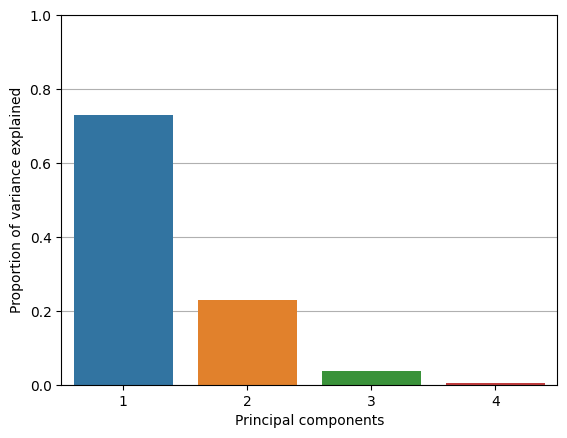

In [53]:
plt.rc('axes', axisbelow=True)
plt.grid()
sns.barplot(x =np.arange(1, pca.n_components_+1), y=pca.explained_variance_ratio_)
plt.xlabel("Principal components")
plt.ylabel("Proportion of variance explained")
plt.ylim(0,1)

**(c) Compare output in “irpc” with “eigen(cor(newiris))”. What do you notice?**

In [54]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 29.8 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=18807bd77fa43e704398efbfc3f0b2f7a19203bebab338eea822aba8daf25f25
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [55]:
# from sklearn.decomposition import FactorAnalysis (not so powerful as factor_analyzer)
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
# n_factors (int, optional) – The number of factors to select. Defaults to 3.
# rotation (str, optional) – Methods include: varimax, promax, oblimin, oblimax, quartimin, quartimax, equamax. Defaults to ‘promax’.
# method ({'minres', 'ml', 'principal'}, optional) – The fitting method to use, either MINRES or Maximum Likelihood. Defaults to ‘minres’.
fa.fit(newiris_scaled)

FactorAnalyzer(method='ml', n_factors=2, rotation='varimax', rotation_kwargs={})

In [56]:
L = fa.loadings_
L

array([[ 0.99748538,  0.00579109],
       [-0.11453763, -0.66490228],
       [ 0.87106782,  0.48618699],
       [ 0.8177141 ,  0.51360145]])

In [57]:
Psi = np.diag(fa.get_uniquenesses())
Psi

array([[0.00498938, 0.        , 0.        , 0.        ],
       [0.        , 0.54478609, 0.        , 0.        ],
       [0.        , 0.        , 0.00486307, 0.        ],
       [0.        , 0.        , 0.        , 0.0675572 ]])

In [58]:
resMat = fa.corr_ - L.dot(np.transpose(L))-Psi
resMat

array([[-1.11022302e-16,  5.30339861e-04,  6.08121824e-05,
        -6.91046750e-04],
       [ 5.30339861e-04, -1.66533454e-15, -5.40322215e-03,
         6.90278800e-02],
       [ 6.08121824e-05, -5.40322215e-03,  1.11022302e-15,
         8.74652611e-04],
       [-6.91046750e-04,  6.90278800e-02,  8.74652611e-04,
         0.00000000e+00]])

In [59]:
fascores = fa.transform(newiris_scaled)
fascores

array([[-0.90037717, -1.12422151],
       [-1.14914413, -0.67018133],
       [-1.38401084, -0.3817151 ],
       [-1.50226986,  0.03525925],
       [-1.01710017, -0.92908386],
       [-0.53209501, -1.42765019],
       [-1.49785939, -0.07371667],
       [-1.02005689, -0.80905624],
       [-1.7458914 ,  0.36016255],
       [-1.14479977, -0.59764247],
       [-0.53784392, -1.65337173],
       [-1.25645962, -0.29875332],
       [-1.26732089, -0.48609537],
       [-1.86614155,  0.22971201],
       [-0.05989304, -2.80311447],
       [-0.16725773, -2.28955546],
       [-0.5377778 , -1.83488651],
       [-0.90111212, -1.10406055],
       [-0.17681363, -2.05144265],
       [-0.8931253 , -1.02957928],
       [-0.54156865, -1.42242577],
       [-0.89604896, -1.00030905],
       [-1.49842981, -0.51933249],
       [-0.90269734, -0.74009286],
       [-1.25219753,  0.00667393],
       [-1.02739102, -0.67081009],
       [-1.02010609, -0.66692525],
       [-0.78004476, -1.22665935],
       [-0.78365416,

**(d)Write down the first two PCs (in formula) and calculate the proportion of variance explained by PC1 and PC2, respectively according to the output in “irpc”.**

PC1:[ 0.52106591,  0.37741762, -0.71956635, -0.26128628] proportion: 72.96%

PC2:[-0.26934744,  0.92329566,  0.24438178,  0.12350962] proportion: 22.85%